# Project Python Foundations: FoodHub Data Analysis

**Marks: 60 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="dark")
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
# Read the data
df = pd.read_csv('foodhub_order.csv') ## Fill the blank to read the data
# Returns the first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Check the shape of the dataset
df.shape

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? Write your observations on the same. [1 Mark]

In [5]:
# Converting "objects" to "category" reduces the data space required to store the dataframe

df.restaurant_name = df.restaurant_name.astype('category')     # Convert restaurant name from object to category
df.cuisine_type = df.cuisine_type.astype('category')         ## Fill the code to convert cuisine type from object to category
df.day_of_the_week = df.day_of_the_week.astype('category')  ## Fill the code to convert day of the week from object to category

# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 103.7+ KB


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Get the summary statistics of the numerical data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
df['rating'][df['rating']=='Not given'].value_counts()

Not given    736
Name: rating, dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [8]:
# Function to plot a boxplot and a histogram along the same scale. 
# Run this chunk of code to define this function - this will be very useful in data visualisation.
# This function is same as the one used in the Mentorship Case Studies earlier. 

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [9]:
# Function to create labeled barplots
# Run this chunk of code to define this function - this will be very useful in data visualisation.
# This function is also same as the one used in the Mentorship Case Studies earlier. 


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 7))
    else:
        plt.figure(figsize=(n + 1, 7))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Cuisine type

In [10]:
# Check unique cuisine type
df['cuisine_type'].unique() ## Complete the code to find out unique cuisine type

['Korean', 'Japanese', 'Mexican', 'American', 'Indian', ..., 'Thai', 'Southern', 'French', 'Spanish', 'Vietnamese']
Length: 14
Categories (14, object): ['Korean', 'Japanese', 'Mexican', 'American', ..., 'Southern', 'French', 'Spanish', 'Vietnamese']

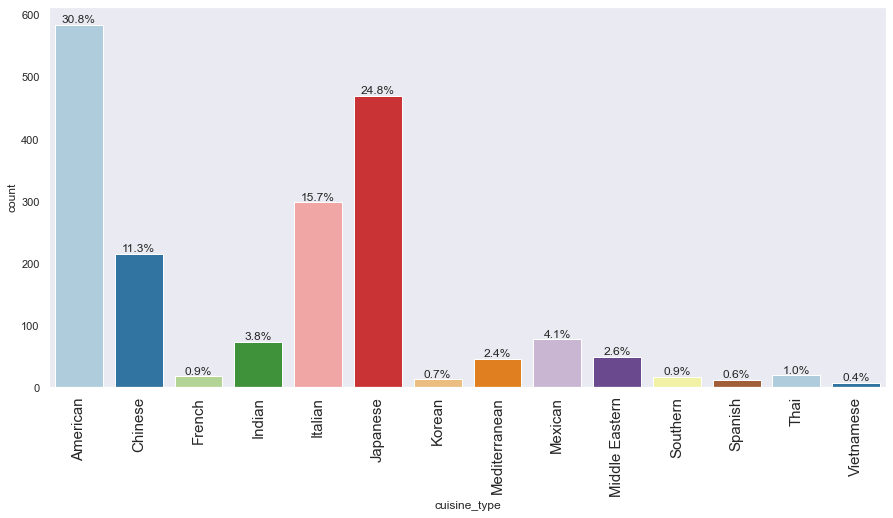

In [11]:
labeled_barplot(df, 'cuisine_type', perc=True)## Labeled barplot for cuisine type. Notice that we are using the function that we defined above.

#### Cost of the order

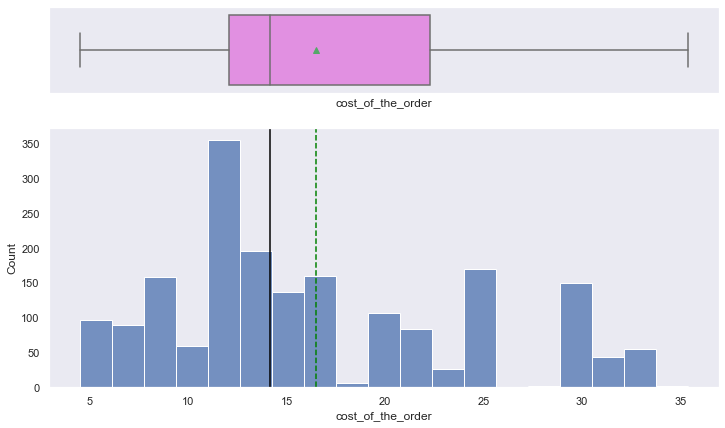

In [12]:
histogram_boxplot(df, 'cost_of_the_order') ## Histogram boxplot for the cost of order

In [13]:
df['cost_of_the_order'].mean()-df['cost_of_the_order'].median()

2.358851422550053

In [14]:
numerical_features=df.select_dtypes(include=["int64","float64"])
numerical_features.columns

Index(['order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time',
       'delivery_time'],
      dtype='object')

In [15]:
skewed_features = numerical_features.apply(lambda x : skew(x.dropna())).sort_values(ascending=False)
skewed_features

customer_id              0.664515
cost_of_the_order        0.621256
food_preparation_time    0.036440
order_id                 0.000000
delivery_time           -0.236349
dtype: float64

In [16]:
skewness=skewed_features[abs(skewed_features)>0.5]
skewness

customer_id          0.664515
cost_of_the_order    0.621256
dtype: float64

#### Day of the week

In [17]:
# # Check the unique values
df['day_of_the_week'].unique() ## Complete the code to check unique values for the 'day_of_the_week' column

['Weekend', 'Weekday']
Categories (2, object): ['Weekend', 'Weekday']

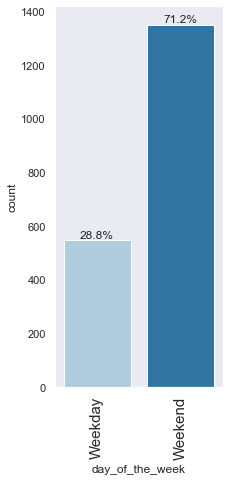

<Figure size 432x288 with 0 Axes>

In [18]:
labeled_barplot(df, 'day_of_the_week', perc=True) ## Complete the code to plot labeled_barplot for 'day_of_the_week' column
plt.savefig("Day of the week_bar", bbox_inches='tight')

#### Rating

In [19]:
# Check the unique values
df['rating'].unique() ## Complete the code to check unique values for the 'rating' column

array(['Not given', '5', '3', '4'], dtype=object)

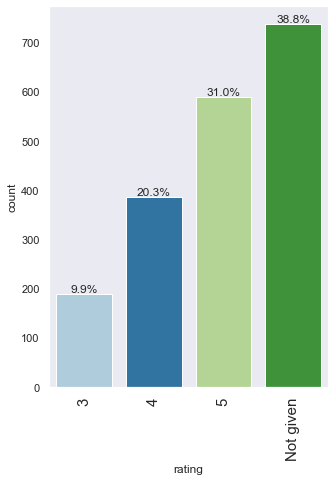

<Figure size 432x288 with 0 Axes>

In [20]:
labeled_barplot(df, 'rating', perc=True) ## Complete the code to plot labeled_barplot for 'rating' column
plt.savefig("rating_bar.jpg", bbox_inches='tight')

#### Food Preparation time

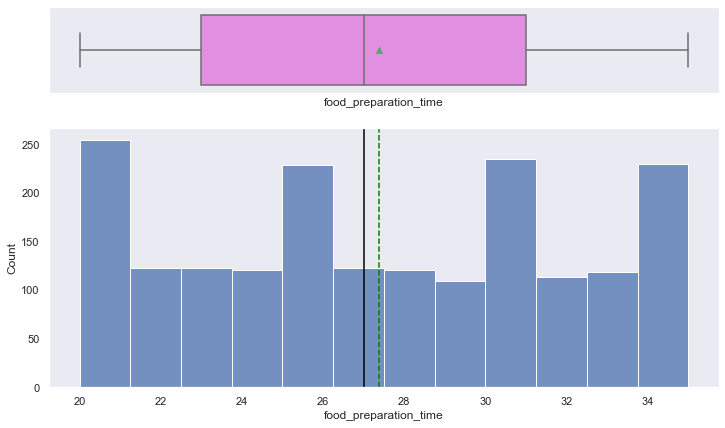

In [21]:
histogram_boxplot(df, 'food_preparation_time') ## Complete the code to plot histogram_boxplot for 'food_preparation_time' column

#### Delivery time

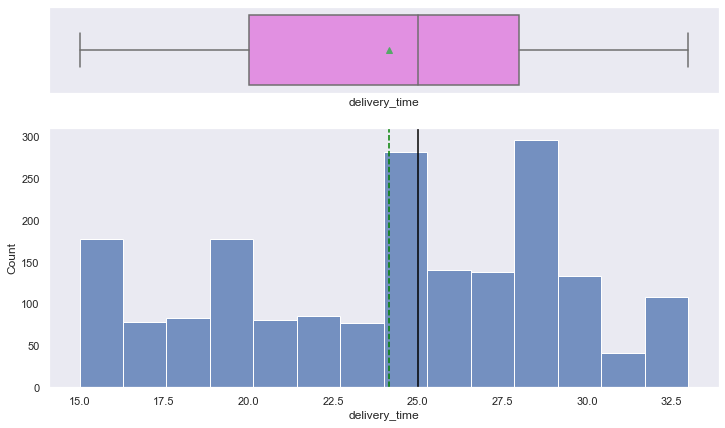

In [22]:
histogram_boxplot(df, 'delivery_time') ## Complete the code to plot histogram_boxplot for 'delivery_time' column
plt.savefig("Delivery time_hist_n_box.jpg", bbox_inches='tight')

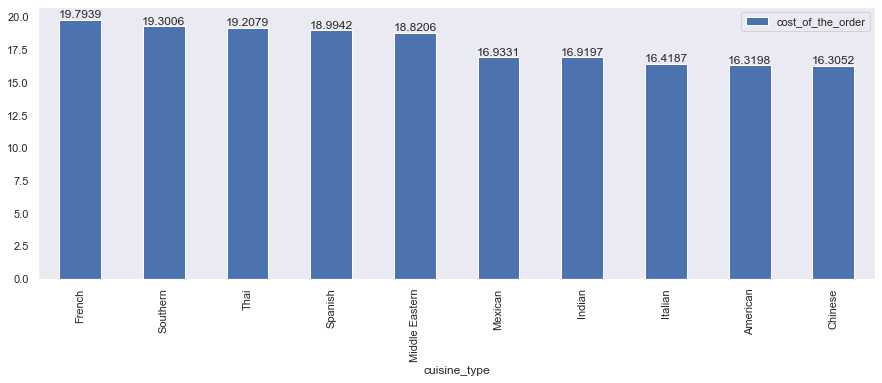

In [23]:
#Cusines with highest order price
bx=df.groupby(by='cuisine_type').mean().reset_index().sort_values(['cost_of_the_order'],
                    ascending=False).head(10).plot(x='cuisine_type',y='cost_of_the_order', 
                                                   kind='bar', figsize=(15,5))
bx.bar_label(bx.containers[0])
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [24]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head() ## Complete the code

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [25]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend.groupby(by='cuisine_type').nunique().head() ## Complete the code to check unique values for the cuisine type on weekend

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,318,36,156,1,4,16,16
Chinese,163,128,13,100,1,4,16,16
French,13,9,3,12,1,4,8,7
Indian,49,39,12,35,1,4,16,15
Italian,207,178,29,109,1,4,16,16


### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [26]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [27]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().sort_values(ascending=False).head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

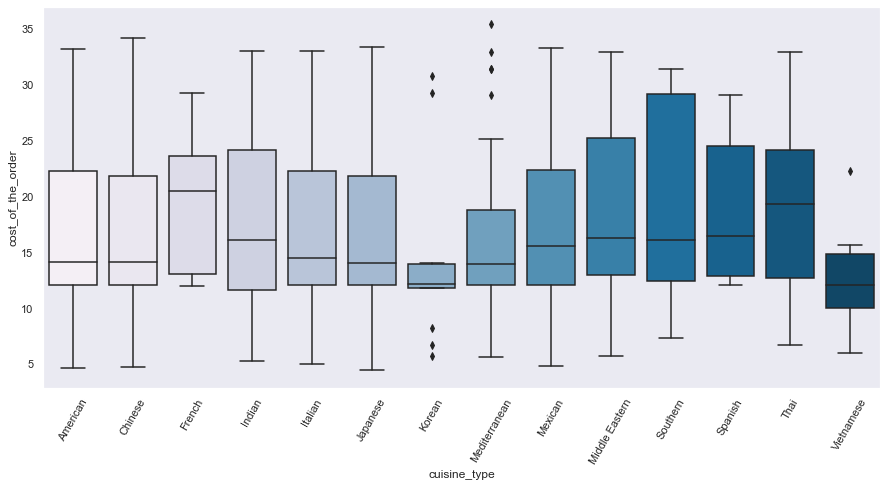

In [29]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

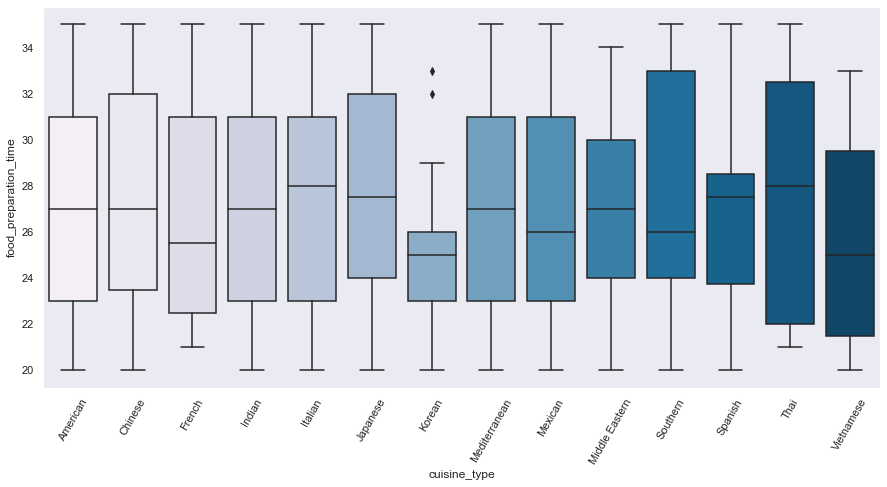

In [30]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

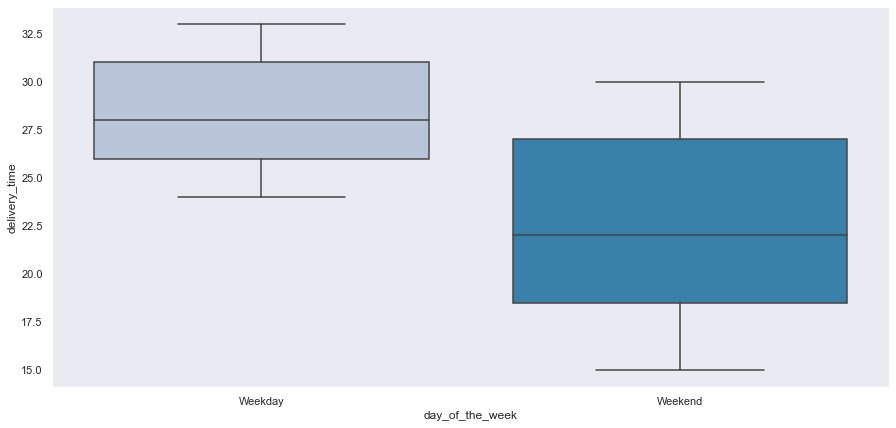

In [31]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [32]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Rating vs Delivery time

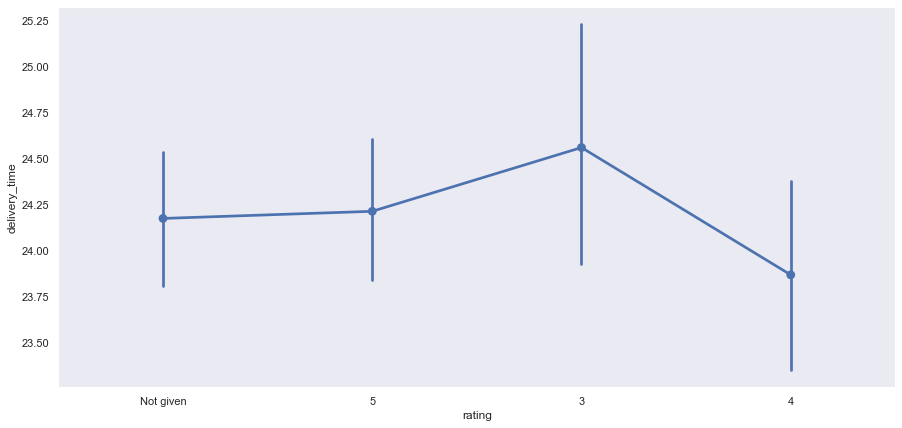

In [33]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

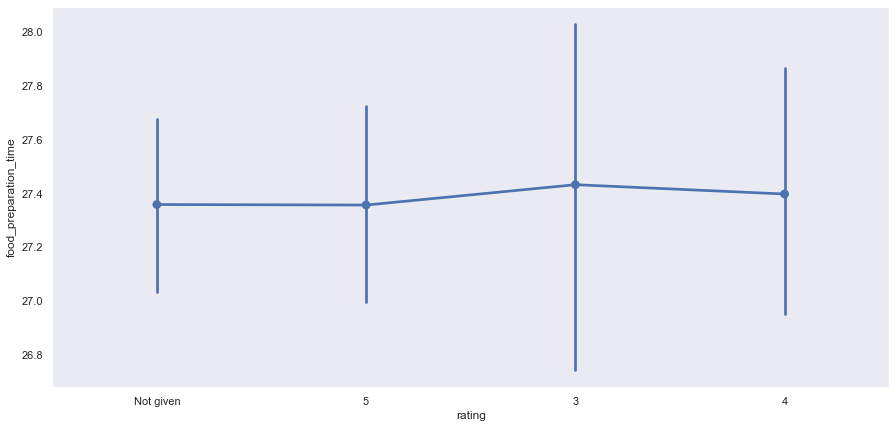

In [34]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Rating vs Cost of the order

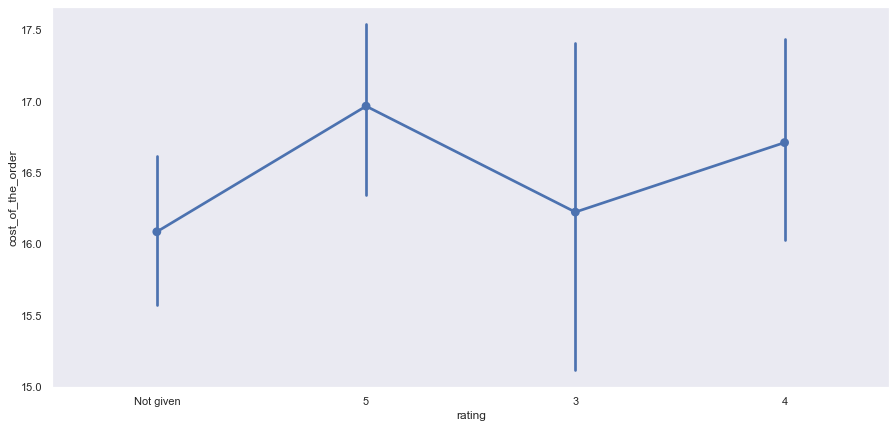

In [35]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Correlation among variables

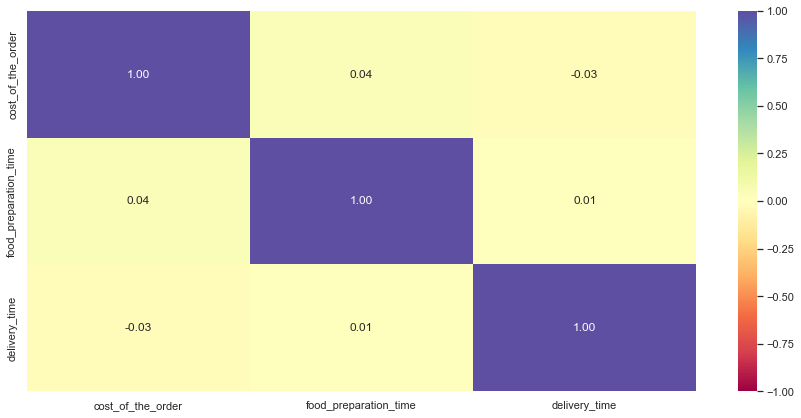

In [36]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [37]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [38]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [39]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 10:
        return x*0.20
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,2.4160
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,2.4460
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,2.3180


In [40]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6843.58 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [41]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
orders_duration_above60 = df['total_time'][df['total_time']>60].count()
no_of_orders = df['order_id'].nunique()
per_orders_above60 = (orders_duration_above60/no_of_orders)*100

print("{:.2f}".format(per_orders_above60),"% of all orders take more than 60 minutes to reach the customer")

10.54 % of all orders take more than 60 minutes to reach the customer


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [42]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

## Write the code below to get the mean delivery time on weekends and print it
avg_duration_wkday = df['delivery_time'][df['day_of_the_week']=='Weekday'].mean()
avg_duration_wkend = df['delivery_time'][df['day_of_the_week']=='Weekend'].mean()

print("The mean delivery time on weekends is around:","{:.2f}".format(avg_duration_wkend),"mins")
print("The mean order delivery time on weekends is faster than during the weekdays by:","{:.2f}".format(avg_duration_wkday-avg_duration_wkend),"mins")

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around: 22.47 mins
The mean order delivery time on weekends is faster than during the weekdays by: 5.87 mins


### Addition of a new category based on the range which the cost of order falls in

In [43]:
bin_labels = ['Below 5 Dollars','5 to 10 Dollars','10 to 20 Dollars', 'Above 20 Dollars']
df['cost_category'] = pd.cut(df['cost_of_the_order'],[0,5,10,20,100],labels=bin_labels)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time,cost_category
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45,Above 20 Dollars
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,2.4160,48,10 to 20 Dollars
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,2.4460,51,10 to 20 Dollars
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40,Above 20 Dollars
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,2.3180,49,10 to 20 Dollars


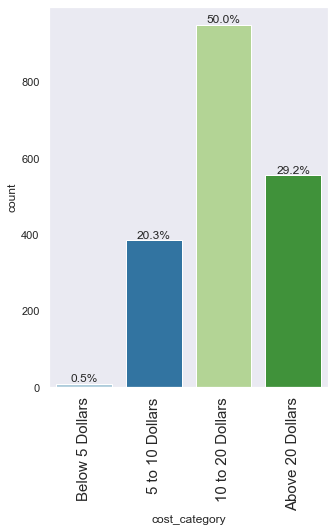

In [44]:
labeled_barplot(df, 'cost_category', perc=True) ## Complete the code to plot labeled_barplot for 'cost_category' column

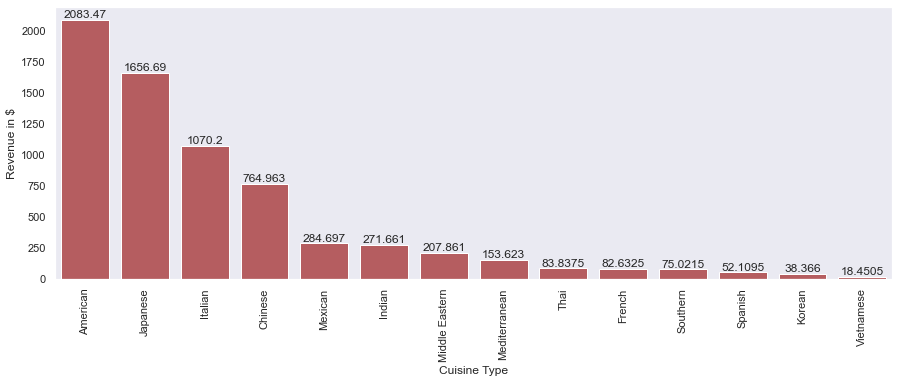

In [45]:
#Revenue by cuisines
df_2 = df.groupby(by='cuisine_type').sum().reset_index().sort_values(['cost_of_the_order'],
                    ascending=False)

plt.figure(figsize=(15,5))
ax = sns.barplot(x='cuisine_type', y='Revenue', data = df_2, color='r',order=df_2.sort_values('Revenue',ascending = False).cuisine_type)
plt.xlabel('Cuisine Type')
plt.ylabel('Revenue in $')
plt.xticks(rotation='vertical')
ax.bar_label(ax.containers[0])
plt.show()

<AxesSubplot:xlabel='cuisine_type'>

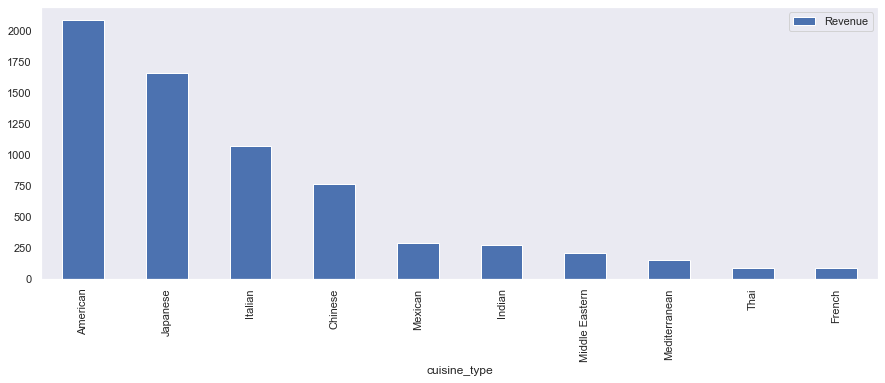

In [46]:
#Cusines with highest order price
df.groupby(by='cuisine_type').sum().reset_index().sort_values(['cost_of_the_order'],
                    ascending=False).head(10).plot(x='cuisine_type',y='Revenue',kind='bar', figsize=(15,5))

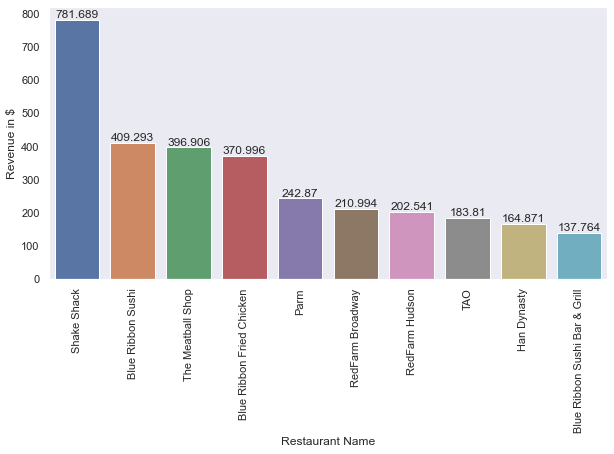

In [47]:
#Restraunts with highest revenue
df_2 = df.groupby(by=['restaurant_name','cuisine_type']).sum().reset_index().sort_values(['cost_of_the_order'],
                    ascending=False).head(10)
plt.figure(figsize=(10,5))
ax = sns.barplot(x='restaurant_name', y='Revenue', data = df_2,order=df_2.sort_values('Revenue',ascending = False).restaurant_name)
plt.xlabel('Restaurant Name')
plt.ylabel('Revenue in $')
plt.xticks(rotation='vertical')
ax.bar_label(ax.containers[0])
plt.show()

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

Goal 1 – Increase Number of Orders:
1. There are always new people moving in to the city so provide discounts for new customers on their first orders through FoodHub.
2. Suggest kitchens for in-demand restaurants to stay open for longer hours. If our data included date and time stamps we could analyse which cuisines/restaurants are popular during which hours of what day of the week and target boosting those orders.
3. Target ads and promotional offers for American, Japanese and Italian (the top 3 cuisines)

Goal 2 – Increase Earning on Orders:
1. Add two additional ranges of order cost that such that we make more than 15% per order on orders lying between 5-10 dollars and 10-20 dollars. The suggested model would have made ≈11% more profit.

Goal 3 – Improve Customer Service and Experience:
1. Rating plays a important role in customer service, it gives appropriate representation of the quality of services provided. Hence, incentivise customers to rate the orders by giving them discounts on delivery on their next order.
2. Display expected delivery time based on customer location and restaurant location to avoid receiving low rating based on delivery time. Delivery time can be reduced by allotting more delivery vehicles or not accepting orders in areas that take more than 20mins to reach the customer. Restaurants should consider preparation time and delivery time when accepting orders and aim to not exceed the 60min mark to complete the orders.
